<h1 style="color:indigo">*Segmentación utilizando RSGISLIB</h1>

<p>Autor: <a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;">Alberto Álvarez Vales</a>     
</p>
Fecha: 15/04/2019

In [1]:
import rsgislib
from rsgislib import segmentation
from rsgislib import imageutils
from rsgislib.segmentation import segutils
from rsgislib import vectorutils 

In [2]:
import richdem

In [3]:
import glob#
import gdal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #para visualizar imágenes en 3D
import numpy as np

In [4]:
inputImg = "tmp_10km.tif"
outputClumps = 'aux_final.kea'
outputMeanImg = 'aux_final_mean.kea'

In [5]:
def visualiza3D(src,titulo="DEM",z="Elevación (m)",color='viridis'):
    dem=src
    ny, nx = dem.shape
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    xv, yv = np.meshgrid(x, y)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    dem3d=ax.plot_surface(xv,-yv,dem,cmap=color, linewidth=0)
    ax.set_title(titulo)
    ax.set_zlabel(z)
    plt.show()

In [6]:
img=gdal.Open(inputImg)
plt.imshow(img.GetRasterBand(1).ReadAsArray())
#plt.figure(figsize=[20,10]);
plt.colorbar()

RuntimeError: tmp_10km.tif: No such file or directory

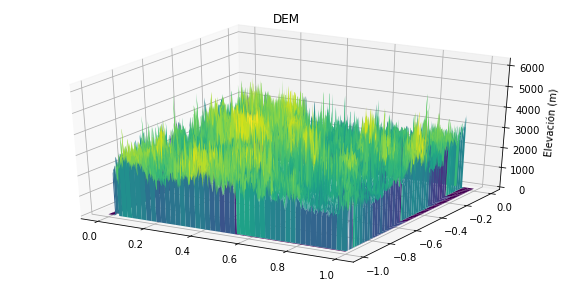

In [18]:
visualiza3D(img.GetRasterBand(1).ReadAsArray())

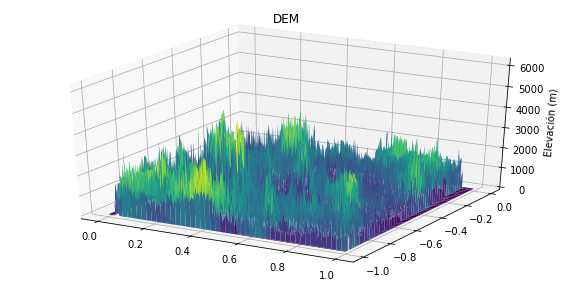

In [19]:
visualiza3D(img.GetRasterBand(2).ReadAsArray())

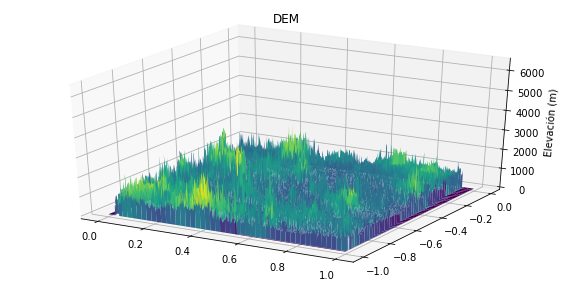

In [22]:
visualiza3D(img.GetRasterBand(3).ReadAsArray())

In [ ]:
#mejor valor
segutils.runShepherdSegmentation(inputImg, outputClumps, outputMeanImg, minPxls=100, distThres=100)
vectorutils.polygoniseRaster(outputMeanImg,"final.shp")

In [ ]:
for th in [1,10,100,200]:
    for minP in [1,10,100,200]: 
        segutils.runShepherdSegmentation(inputImg, outputClumps, outputMeanImg, minPxls=minP, distThres=th)
        vectorutils.polygoniseRaster(outputMeanImg,"Th_"+str(th)+"_minPix_"+str(minP)+".shp")

# SCRIPT

In [33]:
#script
#RSGISLIB se instala con CONDA
#https://www.rsgislib.org/index.html

from rsgislib.segmentation import segutils
from rsgislib import vectorutils 
from os import remove

def segmenta(entrada, salida="+.shp",minPxls=100,distThres=100):
    '''
    Realiza la segmentación del archivo que se pasa como entrada en un archivo shp de salida
    '''
    GRUPOS="tempGrupos.kea"
    RESULTADO="tempImg.kea"
    segutils.runShepherdSegmentation(entrada, GRUPOS, RESULTADO, minPxls=minPxls, distThres=distThres)
    vectorutils.polygoniseRaster(RESULTADO,salida)
    remove(GRUPOS)
    remove(RESULTADO)       

In [34]:
segmenta("tmp_10km.tif","tmp_10km.shp")

Stretch Input Image
Add 1 to stretched file to ensure there are no all zeros (i.e., no data) regions created.
Create Input Image Mask.
Mask stretched Image.
Deleting file: ./tmp_10km_stchdonly.kea
Deleting file: ./tmp_10km_stchdonlyOff.kea
Deleting file: ./tmp_10km_stchdmaskonly.kea
Performing KMeans.
Apply KMeans to image.
Eliminate Single Pixels.
Perform clump.
Eliminate small pixels.
Relabel clumps.
Calculate image statistics and build pyramids.
Deleting file: ./tmp_10km_kmeansclusters.gmtxt
Deleting file: ./tmp_10km_kmeans.kea.aux.xml
Deleting file: ./tmp_10km_kmeans.kea
Deleting file: ./tmp_10km_kmeans_nosgl.kea
Deleting file: ./tmp_10km_kmeans_nosglTMP.kea
Deleting file: ./tmp_10km_clumps.kea
Deleting file: ./tmp_10km_clumps_elim.kea
Deleting file: ./tmp_10km_stchd.kea
Polygonising...
Completed


In [28]:
import ogr

In [29]:
img=ogr.Open("Th_100_minPix_1.shp")

In [3]:
import geopandas as gpd


In [1]:
from ipyleaflet import *

In [8]:
m = Map(center=(42.2, -8.75), zoom=8, basemap=basemaps.Hydda.Full)
m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

In [13]:
datos=gpd.read_file("resultado.shp")


In [14]:
#https://automating-gis-processes.github.io/2016/Lesson5-interactive-map-folium.html

,PXLVAL,geometry
0,2600,"POLYGON ((278827.5619160432 4402221.250635486,..."
1,2683,"POLYGON ((275736.7600315046 4402191.253536779,..."
2,2719,"POLYGON ((279487.7331923525 4402271.2458, 2795..."
3,2770,"POLYGON ((279387.7072413965 4402271.2458, 2794..."
4,2454,"POLYGON ((279017.6112228595 4402261.246767097,..."
5,2305,"POLYGON ((277337.1752467997 4402221.250635486,..."
6,1671,"POLYGON ((273506.181325187 4402141.258372265, ..."
7,3023,"POLYGON ((279567.7539531172 4402271.2458, 2796..."
8,0,"POLYGON ((268254.8189 4402271.2458, 279387.707..."
9,2551,"POLYGON ((278927.5878669992 4402261.246767097,..."


In [18]:
datos['geometry'] = datos['geometry'].to_crs(epsg=4326)

<a href="mailto:alberto@torredebabel.com" style="text-decoration:none;" title="Alberto Álvarez Vales">
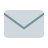</a>
<a href="https://www.linkedin.com/in/albertoav" style="text-decoration:none;" title="Alberto Álvarez Vales">
</a> 